# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio


Foi adiquirido informações de clientes de uma certa instituição financeira durante um certo período de tempo. Esses dados mostram certas características para melhor prever a renda do cliente 

## Etapa 2 Crisp-DM: Entendimento dos dados

Os dados são dos mais variádos, para se ter um entendimento mais geral e completo dos clientes de uma instituição financeira


### Dicionário de dados




| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data no qual os dados foram adquiridos             | object|
| id_cliente              |  Id do Cliente                                      | int64|
| sexo                    |  Sexo do Cliente (M = "Masculino", F = "Feminino")  | object|
| posse_de_veiculo        |  Posui veículo (True = "Sim", False = "Não")        | bool|
| posse_de_imovel         |  Possui imóvel  (True = "Sim", False = "Não")       | bool|
| qtd_filhos              |  Quantidade de filhos           | int64|
| tipo_renda              |  Tipo de renda do cliente (ex: assaliariado, autônomo etc)                          | object|
| educacao                |  Nível de escolaridade ((ex: secundário, superior etc)                           | object|
| estado_civil            |  Estado Cívil  (ex: solteiro, casado etc)                                  | object|
| tipo_residencia         |  Tipo de Residência (ex: casa/apartamento, com os pais etc)      | object|
| idade                   |  Idade do cliente em anos                                   | int64|
| tempo_emprego           |  Tempo que está no emprego em anos                        | float64|
| qt_pessoas_residencia   |  Quantas pessoas moram no residência                | float64|
| renda                   |  Renda                                              | float64|





#### Carregando os pacotes

In [2]:
pip install pandas_profiling

  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=123bc56c3ac23e95f945e693bec912564bf444fa0426c7c9400f789bd549936b
  Stored in directory: c:\users\carlo\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
  Attempting uninstall: statsmodels
    Found existing instal

#### Carregando os dados

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import statsmodels.api as sm

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [5]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [6]:
renda.dtypes

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [3]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [4]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


In [5]:
prof.to_file('./output/renda_analisys.html')

### Entendimento dos dados - Bivariadas




Aqui temos o melhor entendimento de como 2 ou variáveis se relacionam entre si

Primeiramente, vamos ver como Renda e Eduacação se relacionam entre si.

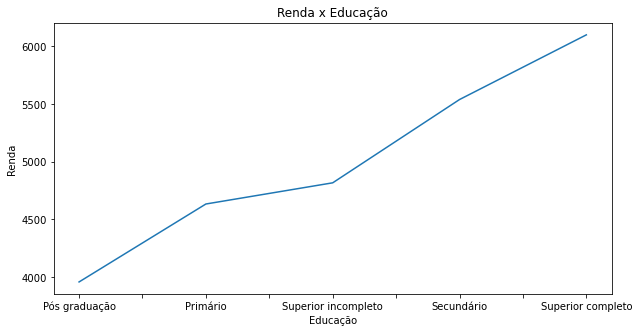

In [6]:
renda.groupby(['educacao'])['renda'].mean().sort_values().plot(figsize = [10, 5])
plt.title('Renda x Educação')
plt.ylabel('Renda')
plt.xlabel('Educação');

* Sendo meio que não intuitivo, o gráfico mostra que um alto nível educacional não necessáriamente quer dizer uma alta renda.
* Mas também não descarta a hipotese que educação não vai vencer na vida
* Para entender o motivo dos pontos anteriores, é necessário fazer um estudo mais apronfundado para ver as relações entre as variáveis  

Agora, vamos entender qual tipo de emprego está pagando mais na média

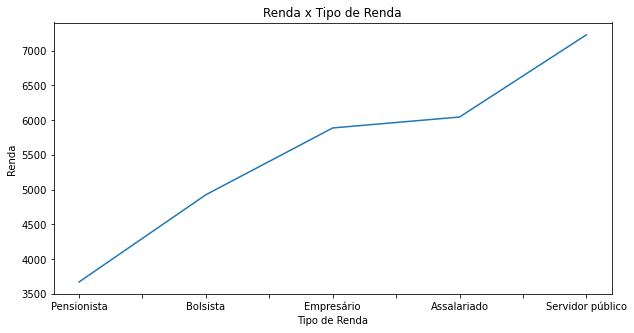

In [7]:
renda.groupby(['tipo_renda'])['renda'].mean().sort_values().plot(figsize = [10, 5])
plt.title('Renda x Tipo de Renda')
plt.ylabel('Renda')
plt.xlabel('Tipo de Renda');

* Servidor público parece na média estar melhor de vida quando comparado com os outros
* Pensionista está em último lugar não é supressa 

Tentamos agora ter um melhor entendimento como 2 variáveis se relacionam e qual é o peso em cada

In [8]:
renda.corr()

,Unnamed: 0,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
Unnamed: 0,1.000000,0.016565,-0.003302,-0.000299,-0.002281,-0.001438,0.004102,-0.003191,0.004901
id_cliente,0.016565,1.000000,-0.012072,-0.102863,0.030296,-0.057812,-0.036373,0.037951,-0.009129
posse_de_veiculo,-0.003302,-0.012072,1.000000,-0.014172,0.118690,-0.178903,-0.076155,0.167240,0.100493
posse_de_imovel,-0.000299,-0.102863,-0.014172,1.000000,-0.022738,0.140510,0.009465,-0.023415,0.003880
qtd_filhos,-0.002281,0.030296,0.118690,-0.022738,1.000000,-0.360426,-0.063220,0.889777,0.029346
idade,-0.001438,-0.057812,-0.178903,0.140510,-0.360426,1.000000,0.321573,-0.339320,0.022435
tempo_emprego,0.004102,-0.036373,-0.076155,0.009465,-0.063220,0.321573,1.000000,-0.065670,0.385013
qt_pessoas_residencia,-0.003191,0.037951,0.167240,-0.023415,0.889777,-0.339320,-0.065670,1.000000,0.047842
renda,0.004901,-0.009129,0.100493,0.003880,0.029346,0.022435,0.385013,0.047842,1.000000


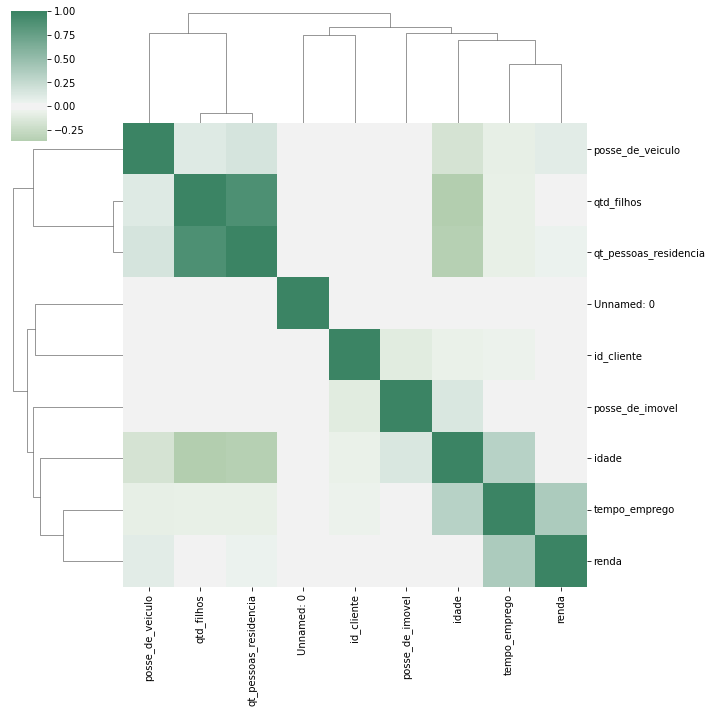

In [9]:
cmap = sns.diverging_palette(h_neg=125, h_pos=150, as_cmap=True, sep = 10, center = 'light')

sns.clustermap(renda.corr(), figsize=(10, 10), center = 0, cmap=cmap)

O que parece influenciar a renda é o tempo de emprego

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>
* Para fazer a limpeza dos dados, tem que identificar quais que possuem dados faltantes e se são significativos
* Como os dados faltantes representam uma parte considerável do total de dados, é necessário trata-los, para que não se perca boa parte dos dados
* O jeito encontrado de tratar os dados faltantes foi substitui-los pela mediana
* As variáveis qualitativas foram substituidas por dummies, para ser mais fácil os passos seguintes

In [12]:
renda.nunique()

Unnamed: 0               15000
data_ref                    15
id_cliente                9845
sexo                         2
posse_de_veiculo             2
posse_de_imovel              2
qtd_filhos                   8
tipo_renda                   5
educacao                     5
estado_civil                 5
tipo_residencia              6
idade                       47
tempo_emprego             2589
qt_pessoas_residencia        9
renda                     9786
dtype: int64

In [15]:
renda.drop(['Unnamed: 0', 'id_cliente'], axis = 1)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [30]:
x = renda['tempo_emprego'].isnull().sum()
y = len(renda['tempo_emprego'])
print(x, y)
print(x/y)

2573 15000
0.17153333333333334


In [83]:
renda_sem_na = renda.fillna(renda['tempo_emprego'].notnull().median())
renda_sem_na['tempo_emprego'].isnull().sum()

0

In [36]:
renda_sem_na['data_ref'].max()

'2016-03-01'

In [84]:
dummies1 = pd.get_dummies(renda_sem_na['posse_de_veiculo'])
dummies2 = pd.get_dummies(renda_sem_na['sexo'])
dummies3 = pd.get_dummies(renda_sem_na['posse_de_imovel'])
dummies4 = pd.get_dummies(renda_sem_na['tipo_renda'])
dummies5 = pd.get_dummies(renda_sem_na['educacao'])
dummies6 = pd.get_dummies(renda_sem_na['tipo_residencia'])
dummies7 = pd.get_dummies(renda_sem_na['estado_civil'])

In [85]:
renda_dummies = pd.concat([renda_sem_na, dummies1, dummies2, dummies3, dummies4, dummies5, dummies6, dummies7], axis = 1)
renda_dummies

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,...,Casa,Com os pais,Comunitário,Estúdio,Governamental,Casado,Separado,Solteiro,União,Viúvo
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,...,1,0,0,0,0,0,0,1,0,0
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,...,1,0,0,0,0,1,0,0,0,0
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,...,1,0,0,0,0,1,0,0,0,0
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,...,1,0,0,0,0,1,0,0,0,0
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,...,1,0,0,0,0,0,0,1,0,0
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,...,1,0,0,0,0,0,0,1,0,0
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,...,1,0,0,0,0,1,0,0,0,0
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,...,1,0,0,0,0,1,0,0,0,0


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo



Será utilizado a arvore de decisão para decidir quais são as melhores variáveis para explicar o motivo o valor da renda

### Rodando o modelo



* Foi feito o processo de dummies para as variáveis qualitativas, assim é possível utilizar o código da árvore de decisão
* Logo em seguida foi separados em teste e treino a tabela

In [68]:
X = renda_dummies.drop(['data_ref','renda', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], axis = 1)
y = renda_dummies.renda

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [86]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_3 = DecisionTreeRegressor(max_depth=4)
regr_4 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [87]:
# mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)
mse3 = regr_3.score(X_train, y_train)
mse4 = regr_3.score(X_train, y_train)

template = "O MSE da árvore com profundidade = {0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))
print(template.format(regr_3.get_depth(),mse3).replace(".",","))
print(template.format(regr_4.get_depth(),mse4).replace(".",","))

O MSE da árvore com profundidade = 2 é: 0,27
O MSE da árvore com profundidade = 3 é: 0,41
O MSE da árvore com profundidade = 4 é: 0,49
O MSE da árvore com profundidade = 5 é: 0,49


## Etapa 5 Crisp-DM: Avaliação dos resultados



* Os resultados mostram que a árvore apresenta o menor MSE quando se têm profundidade = 2

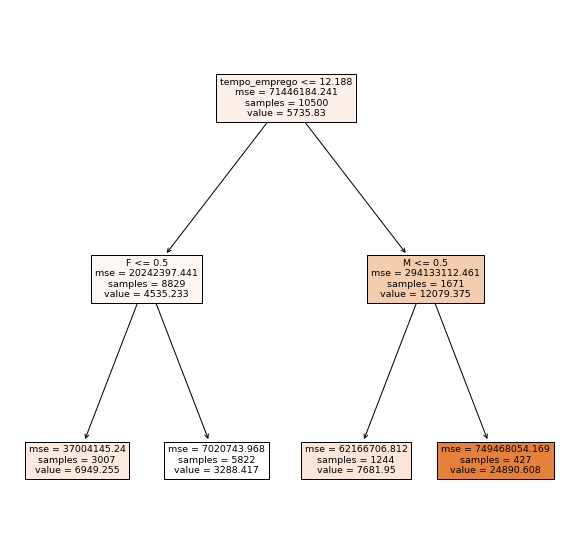

In [90]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True) 

A variável mais relevante para renda é o tempo no qual a pessoa está empregada

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

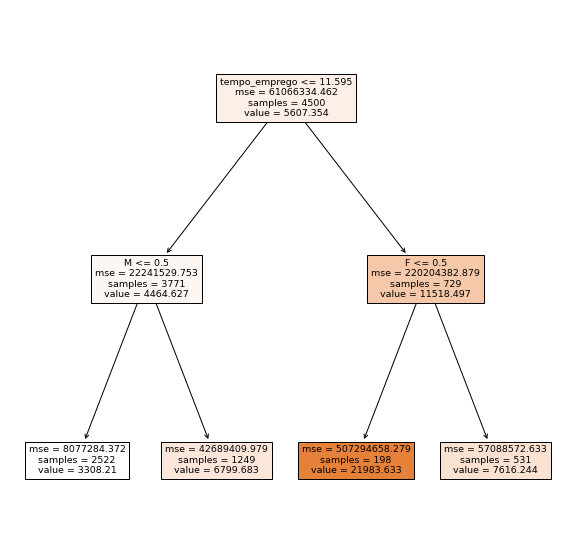

In [93]:
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X_test, y_test)

plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(reg, 
                    feature_names=X.columns,  
                    filled=True) 

Como já tinha sido demonstrado na correlação, a variável mais relevante para justificar a renda é o tempo no qual a pessoa está empregada